# Sequence with synchronous update
In this notebook we show that the mechanism of sequence bulding in the sense of Amit works for synchronous update rule

In [3]:
from __future__ import print_function
import sys
sys.path.append('../')

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

from hopfield import HopfieldSequence

%matplotlib inline
sns.set(font_scale=2.0)

Parameters

In [5]:
prng = np.random.RandomState(seed=101)

n_dim = 200
n_store = 10
q = 10
T = 0.0
tau = 5

Then we create the patterns that we store and the network

In [6]:
list_of_patterns = [np.sign(np.random.normal(size=n_dim)) for i in range(n_store)]
list_of_patterns_sequence = list_of_patterns[:q]

nn = HopfieldSequence(n_dim=n_dim, tau=tau, g_delay=2.0, T=T, prng=prng)
nn.train(list_of_patterns, normalize=True)
nn.train_delays(list_of_patterns_sequence, normalize=True) 

Now we run the simulation

In [7]:
N = 55

nn.s = np.copy(list_of_patterns[0])
history = np.zeros((N, n_store))
for i in range(N):
    nn.update_sync()
    # nn.update_async_random_sequence()
    # nn.update_async()
    history[i, :] = nn.calculate_overlap()


#### Plotting

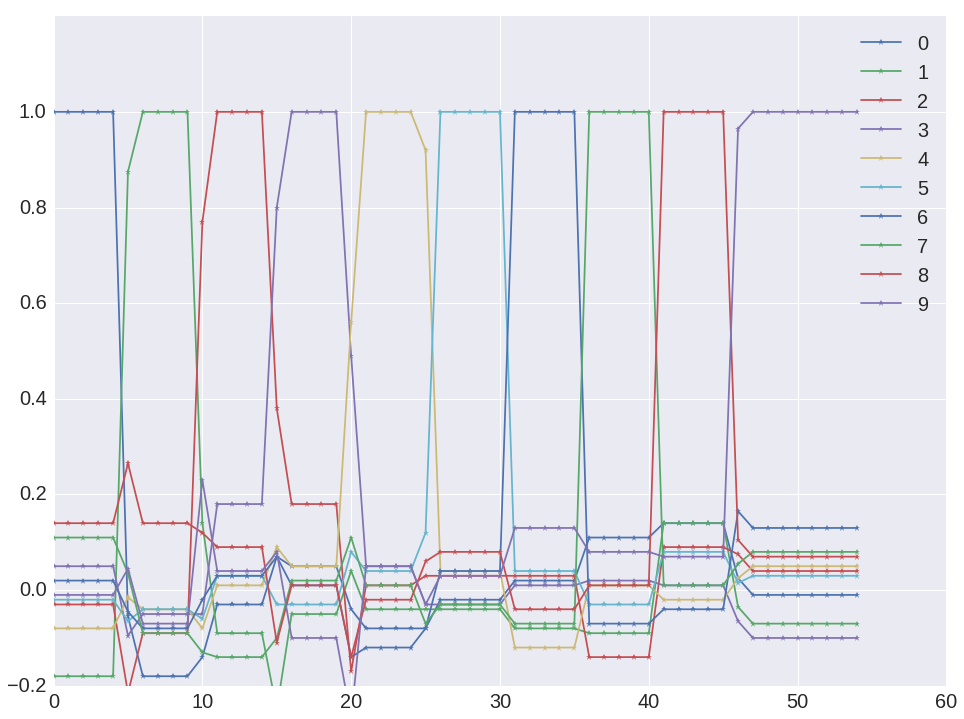

In [9]:
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)

for index, overlap in enumerate(history.T):
    ax.plot(overlap, '-*', label=str(index))

ax.set_ylim([-0.2, 1.2])
ax.legend()
plt.show()